In [33]:
# Import required libraries
from __future__ import division
import requests
import json
import math
import matplotlib.pyplot as plt
import time
import pandas
import csv
import seaborn as sns

%matplotlib inline

In [13]:
# set key
key = "d63713f5fe3646b0a6ab66ae0b0e3d96"

# set base url
base_url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

#set range for our year
year_range = range(1989, 2018)

#create empty list varible
year_tuple = list()
for year in year_range:
    print(year)

    # set search parameters
    search_params = {"q": "global city",
                 "api-key": key,
                 "begin_date": str(year)+"0101",  # create year range from the element variable
                 "end_date": str(year)+"1231"}

    # make request
    r = requests.get(base_url, params=search_params)

    # wait 3 seconds for the GET request
    time.sleep(3)

    # convert to a dictionary
    data = json.loads(r.text)

    # get number of hits
    hits = data['response']['meta']['hits']
    print("number of hits: ", str(hits))
    year_tuple.append(tuple((year, hits)))

1989
number of hits:  270
1990
number of hits:  299
1991
number of hits:  275
1992
number of hits:  288
1993
number of hits:  276
1994
number of hits:  308
1995
number of hits:  323
1996
number of hits:  379
1997
number of hits:  462
1998
number of hits:  628
1999
number of hits:  777
2000
number of hits:  848
2001
number of hits:  1311
2002
number of hits:  1159
2003
number of hits:  915
2004
number of hits:  1009
2005
number of hits:  860
2006
number of hits:  1310
2007
number of hits:  1676
2008
number of hits:  1758
2009
number of hits:  1951
2010
number of hits:  1842
2011
number of hits:  1911
2012
number of hits:  2044
2013
number of hits:  1759
2014
number of hits:  1862
2015
number of hits:  2013
2016
number of hits:  2605
2017
number of hits:  2194


In [14]:
df_years = pandas.DataFrame(year_tuple, columns = ["year", "count"])
df_years

,year,count
0,1989,270
1,1990,299
2,1991,275
3,1992,288
4,1993,276
5,1994,308
6,1995,323
7,1996,379
8,1997,462
9,1998,628


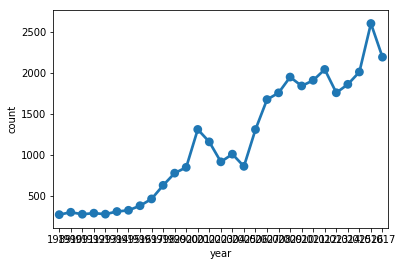

In [34]:
sns.pointplot(x='year', y='count', data = df_years)